<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/matplotlib01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# メモ

1. matplotlibで数直線とか、ただの三角とか描きたい。
1. 本家サイト https://matplotlib.org/
1. いろいろできあがりとか使い方のサイトはあるのだが基本からわからりたい。まああがいてみるか。
1. どうやらmatplotlibは数直線とかただの三角形を描くには向いていないみたいだが、SVGで描くのもめんどうかもしれない。考えよう。

# 導入

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

まず気づくこと
1. インポートが  pyplot なのですね。で  plt これも変わった省略の仕方だ。 plot-> pltか。
2.  sympy とかではなくて   numpy をインポートする。

numpy  ってあまり Python の入門コースには出てこないけど。別途学ぶ必要があるかもしれない。

おお、そう言えば    ndarray   って    numpy  かもしれない。

ndarray は N-dimensional array だって。numpy の n ではなかった。

あと、そもそも、python はリストとタプルなので、array という型はないみたい。

In [ ]:
import numpy as np
arr = [[1, 2], [3, 4]]
# ndarray を作る
a = np.array(arr)
print (type (arr))
print (type (a))
print (a)
print (a.ndim) # 次元数
print (a.shape) # m * n
print (a.size) # 要素数
print (a.dtype) # データ型 int とか float とか
print (a.data)

<class 'list'>
<class 'numpy.ndarray'>
[[1 2]
 [3 4]]
2
(2, 2)
4
int64


In [ ]:
np.ndarray?

### Colabにようこそ、の例


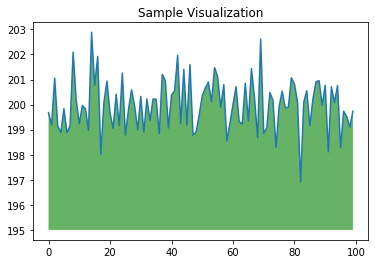

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

さて、

> ys = 200 + np.random.randn(100)  
> x = [x for x in range(len(ys))]

は何をしているのか。

In [ ]:
np.random.randn?

In [ ]:
np.random.randn(2)

array([ 0.22753914, -1.5864957 ])

ということは200は何でもよくて、100も適当か。すこしいじってみよう。

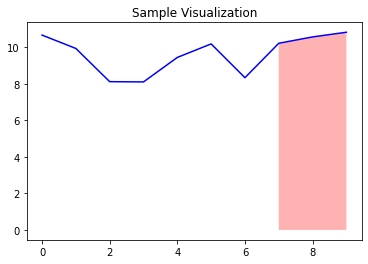

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 10 + np.random.randn(10)
x = [x for x in range(len(ys))]

plt.plot(x, ys, 'b')
plt.fill_between(x, ys, where=(ys > 10), facecolor='r', alpha=0.3)

plt.title("Sample Visualization")
plt.show()

`np.random.randn()` は引数の数の数列を作っている。  
最小値、最大値はなんだろう。  
見てみよう。

In [ ]:
print (max(np.random.randn(100)))
print (min (np.random.randn(100)))

1.5675539192839099
-3.0653519334865305


ゼロを挟んで正規曲線なのですね。だいたい $\pm2.5$ くらいだけど、まれに 3 以上のこともある。

さて、次はプロットの部分だが。

> plt.plot(x, ys, '-')  
> plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

さっきついでにいじくったのでわかったことがある。

`plt.plot()` で線を引いている。`plt.fll_between()` は色を塗っている。 x軸、y軸を引いたり、範囲を決めたりするコードはない。別途グラフにタイトルはつけているが、軸上にある数値も自動でついている。

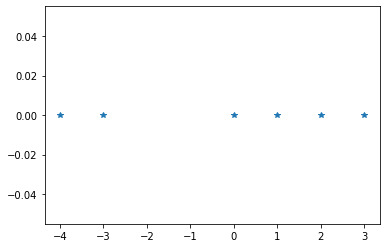

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

x = [-4, -3, 0, 1, 2, 3]
y = [0, 0, 0, 0, 0, 0]

plt.plot(x, y, '*')

plt.show()

えっととりあえずの目的はグラフを描くことではなく、数直線や図形なのでその辺を選んでドキュメントや作例を見ていこう。

# 数直線

horizontal line matplotlib

arrow line matplotlib

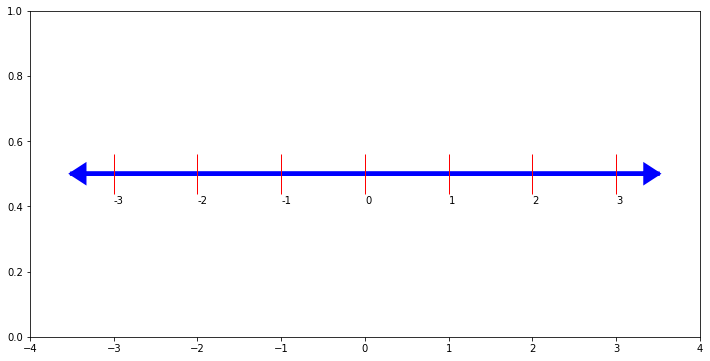

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6)).add_subplot(xlim=(-4,4), ylim=(0, 1.0))

# x2 = fig.add_subplot(223, title='ax2', xlim=(-4, 4), ylabel='y2a')

# blue arrow
plt.arrow(-3.5, 0.5, 7, 0, head_width=0.05, head_length=0.15, linewidth=4, color='b', length_includes_head=True)
plt.arrow(3.5, 0.5, -7, 0, head_width=0.05, head_length=0.15, linewidth=4, color='b', length_includes_head=True)

x = [-3, -2, -1, 0, 1, 2, 3]
y = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
data_name = ["-3", "-2", "-1", "0", "1", "2", "3"]
plt.plot(x, y, 'r|', ms="40", label="数直線")
xy = zip (x, y)
xy_name = zip (xy, data_name)
for (i, name) in zip (xy, data_name) :
    plt.annotate(name,i, xycoords='data', xytext=(0,-30), textcoords='offset points')
# plt.annotate ("0", (0,0))


# red arrow
# plt.arrow(0.15, 0.5, 0.75, 0, head_width=0.05, head_length=0.03, linewidth=4, color='r', length_includes_head=True)

# green arrow
# plt.arrow(0.85, 0.5, -0.7, 0, head_width=0.05, head_length=0.03, linewidth=4, color='g', length_includes_head=True)

plt.show()

In [ ]:
plt.annotate?

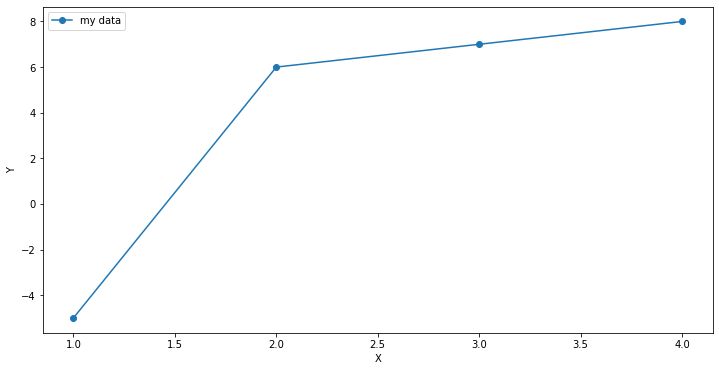

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure (figsize=(12,6))
x = [1,2,3,4]
y = [-5,6,7,8]
plt.plot(x, y, 'o-', label="my data") # plot ... w lp title "my data"
plt.xlabel("X")         # set xlabel "X"
plt.ylabel("Y")         # set ylabel "Y"
plt.legend(loc='best')  # set key
plt.show()



matplotlib  arrow 数直線
で検索

[0.29298683 0.17855297 0.63544128 0.25550461 0.99171352 0.58464842
 0.68744983]


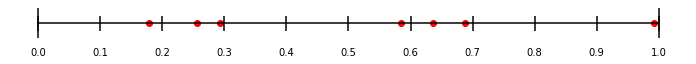

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

#テキトーな配列を生成
rand_size = 7 #配列のサイズ
rand = np.random.random_sample(rand_size) #テキトーな配列を生成
print(rand)
rand = sorted(rand) #ソート
y = [0]*rand_size #y=0

#数直線
fig,ax=plt.subplots(figsize=(10,10)) #画像サイズ
fig.set_figheight(1) #高さ調整
ax.tick_params(labelbottom=True, bottom=False) #x軸設定
ax.tick_params(labelleft=False, left=False) #y軸設定

xmin, xmax= 0,1 #数直線の最小値・最大値
plt.tight_layout() #グラフの自動調整
plt.scatter(rand,y,c='r') #散布図
plt.hlines(y=0,xmin=xmin,xmax=xmax) #横軸
plt.vlines(x=[i for i in range(xmin,xmax+1,1)],ymin=-0.04,ymax=0.04) #目盛り線（大）
plt.vlines(x=[i/10 for i in range(xmin*10,xmax*10+1,1)],ymin=-0.02,ymax=0.02) #目盛り線（小）
line_width=0.1#目盛り数値の刻み幅
plt.xticks(np.arange(xmin,xmax+line_width,line_width)) #目盛り数値
pylab.box(False) #枠を消す

[0.0160644  0.15360279 0.61577728 0.76449449 0.14012963 0.80292844
 0.08119071]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


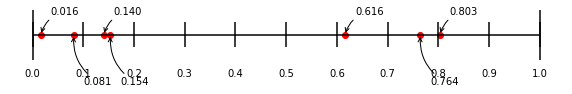

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

#テキトーな配列を生成
rand_size = 7 #配列のサイズ
rand = np.random.random_sample(rand_size) #テキトーな配列を生成
print(rand)
rand = sorted(rand) #ソート
y = [0]*rand_size #y=0

#数直線
fig,ax=plt.subplots(figsize=(10,10)) #画像サイズ
fig.set_figheight(1) #高さ調整
ax.tick_params(labelbottom=True, bottom=False) #x軸設定
ax.tick_params(labelleft=False, left=False) #y軸設定

#数直線上の数値を表示
for i in range(int(rand_size/2)+1):
    ax.annotate('{0:.3f}'.format(rand[2*i]),
                 xy=(rand[2*i],y[2*i]),
                 xytext=(10, 20),
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.3")
                )

for i in range(int(rand_size/2)):
    ax.annotate('{0:.3f}'.format(rand[2*i+1]),
                 xy=(rand[2*i+1],y[2*i+1]),
                 xytext=(10, -50),
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-.3")
                )

xmin, xmax= 0,1 #数直線の最小値・最大値
plt.tight_layout() #グラフの自動調整
plt.scatter(rand,y,c='r') #散布図
plt.hlines(y=0,xmin=xmin,xmax=xmax) #横軸
plt.vlines(x=[i for i in range(xmin,xmax+1,1)],ymin=-0.04,ymax=0.04) #目盛り線（大）
plt.vlines(x=[i/10 for i in range(xmin*10,xmax*10+1,1)],ymin=-0.02,ymax=0.02) #目盛り線（小）
line_width=0.1#目盛り数値の刻み幅
plt.xticks(np.arange(xmin,xmax+line_width,line_width)) #目盛り数値
pylab.box(False) #枠を消す

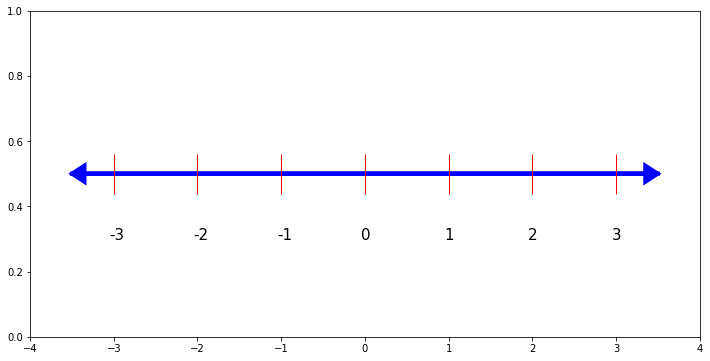

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

ax=plt.figure(figsize=(12,6)).add_subplot(xlim=(-4,4), ylim=(0, 1.0))

plt.arrow(-3.5, 0.5, 7, 0, head_width=0.05, head_length=0.15, linewidth=4, color='b', length_includes_head=True)
plt.arrow(3.5, 0.5, -7, 0, head_width=0.05, head_length=0.15, linewidth=4, color='b', length_includes_head=True)

x = [-3, -2, -1, 0, 1, 2, 3]
y = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
data_name = ["-3", "-2", "-1", "0", "1", "2", "3"]
plt.plot(x, y, 'r|', ms="40")

for (i, j, name) in zip (x, y, data_name) :
    plt.text(i, j, name, fontsize=15, position=(i-0.05, j-0.2))

plt.savefig("numberline.svg")
plt.show()

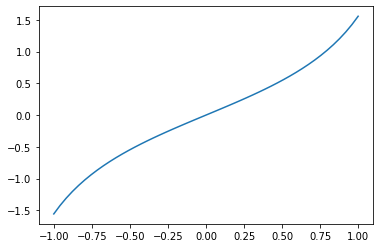

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace (-1, 1)
y = np.tan(x)

plt.plot(x, y)

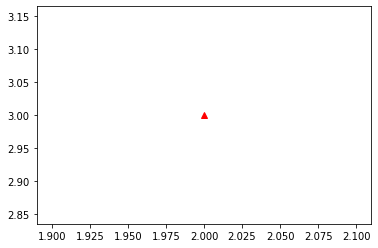

In [27]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(2,3, "r^")

In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot?